# Simulation

- In this lesson, we will work through several examples of using random numbers to simulate real-world scenarios.
- For reference, the [viz module](./viz.py) contains the visuals used for these lessons.

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import viz # curriculum example visualizations

np.random.seed(29)

## Generating Random Numbers with Numpy

The `numpy.random` module provides a number of functions for generating random numbers.

- `np.random.choice`: selects random options from a list
- `np.random.uniform`: generates numbers between a given lower and upper bound
- `np.random.random`: generates numbers between 0 and 1
- `np.random.randn`: generates numbers from the standard normal distribution
- `np.random.normal`: generates numbers from a normal distribution with a specified mean and standard deviation

In [12]:
np.random.choice(['A','B','1'], size=10)

array(['A', 'B', 'B', '1', '1', 'A', 'B', 'B', 'A', '1'], dtype='<U1')

In [18]:
np.random.uniform(10,20, size=10)

array([12.85671928, 16.84463747, 18.40919735, 18.0915342 , 10.00063496,
       19.23610095, 18.06965163, 19.56012401, 14.8472899 , 16.62574004])

In [20]:
np.random.random(10)

array([0.46611213, 0.8054482 , 0.43798753, 0.12903977, 0.64215057,
       0.4786437 , 0.65812077, 0.08335293, 0.66372314, 0.49094009])

<AxesSubplot:>

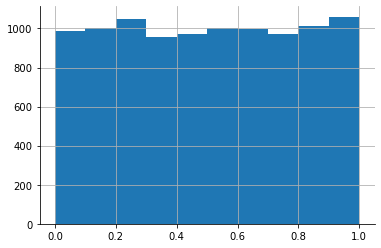

In [28]:
pd.Series(np.random.random(10_000)).hist()

<AxesSubplot:>

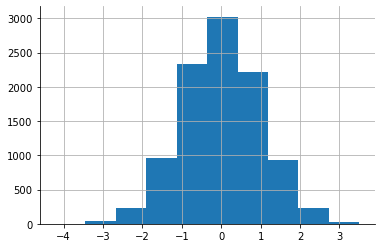

In [36]:
pd.Series(np.random.randn(10_000)).hist()

<AxesSubplot:>

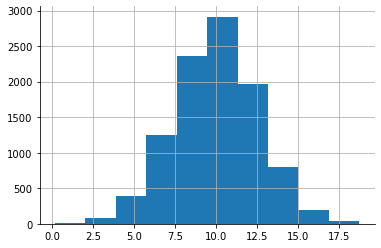

In [38]:
pd.Series(np.random.normal(10, 2.5, size=10_000)).hist()

## How to run simulations with numpy/python/pandas

### Process
1. Represent the data
2. Create a matrix of random numbers
3. Apply an aggregate row-wise to produce the results of each simulation
4. Aggregate the resulting data to get our experimental probability

## What's the probaility of rolling a 2 on a 6-sided die?

- What is the expected probability?

In [39]:
1/6

0.16666666666666666

### 1. Represent the data

In [47]:
# define possible dice outcomes
outcomes = [1,2,3,4,5,6]

# define number of simulations
n_simulations = 10

### 2. Create a matrix of random numbers

In [49]:
#create matrix using np.random.choice()
rolls = np.random.choice(outcomes, n_simulations)
rolls

array([4, 5, 5, 2, 5, 3, 6, 4, 2, 4])


### 3. Apply an aggregate row-wise to produce the results of each simulation

In [52]:
#count all the rolls that equal to 2
(rolls == 2).sum()

2

### 4. Aggregate the resulting data to get our experimental probability

In [53]:
#total number of Trues diveded by total rolls
(rolls == 2).sum() / len(rolls)

0.2

In [56]:
#take the average of boolean array 
(rolls == 2).mean()

0.2

### Expected Probability

In [57]:
1/6

0.16666666666666666

### Consolidate & increase trial size

In [69]:
# define possible dice outcomes
outcomes = [1,2,3,4,5,6]

# define number of simulations
n_simulations = 10_000


rolls = np.random.choice(outcomes, n_simulations)

(rolls == 2).mean()

0.1655

# YAY Completed simulation!

- Also known as the monte carlo method

## What is the probability that we roll 5 or greater on a die roll? 

### Expected?

In [70]:
2/6

0.3333333333333333

### Simulate!

In [73]:
# define possible dice outcomes
outcomes = [1,2,3,4,5,6]

# define number of simulations
n_simulations = 10_000


rolls = np.random.choice(outcomes, n_simulations)

(rolls >= 5).mean()

0.3257

## What's the probability of getting 2 or more heads after flipping 3 coins?

### 1. Represent the data

In [74]:
outcomes = ['H','T']

n_simulations = 10_000
n_trials = 3 

### 2. Create a matrix of random numbers

In [107]:
#set up number of simulations and number of coin flips
coinflips = np.random.choice(outcomes, (n_simulations, n_trials))
coinflips

array([['H', 'H', 'H'],
       ['T', 'T', 'H'],
       ['T', 'H', 'H'],
       ...,
       ['H', 'T', 'H'],
       ['H', 'H', 'T'],
       ['T', 'T', 'H']], dtype='<U1')

In [108]:
len(coinflips)

100000

- Here the `(10_000, 3)` tuple tells numpy the shape of the matrix to generate. 
- Since we are flipping 3 coins we have 3 columns, and we are doing 10_000 simulations, we'll have 20 rows.

### 3. Apply an aggregate row-wise to produce the results of each simulation

- Count how many heads there are for each simlution

In [109]:
coinflips

array([['H', 'H', 'H'],
       ['T', 'T', 'H'],
       ['T', 'H', 'H'],
       ...,
       ['H', 'T', 'H'],
       ['H', 'H', 'T'],
       ['T', 'T', 'H']], dtype='<U1')

In [113]:
(coinflips == 'H').sum(axis=1)

array([3, 1, 2, ..., 2, 2, 1])

In [114]:
#be sure to sum across each simulation aka across each row (axis=1)
head_count = (coinflips == 'H').sum(axis=1)
head_count

array([3, 1, 2, ..., 2, 2, 1])

- this 1-d array shows how many heads appeared in each simulations
- we want to know how many times we have 2 or more heads, so lets convert that to a boolean array when our head count is 2 or greater

In [115]:
head_count >= 2

array([ True, False,  True, ...,  True,  True, False])

### 4. Aggregate the resulting data to get our experimental probability
- Here we'll calculate the number of successful trials 

In [116]:
(head_count >= 2).mean()

0.50055

### Consolidate & increase simulations!

In [117]:
outcomes = ['H','T']

n_simulations = 100_000
n_trials = 3 

coinflips = np.random.choice(outcomes, (n_simulations, n_trials))
head_count = (coinflips == 'H').sum(axis=1)

(head_count >= 2).mean()

0.50204

## Carnival Dice Rolls

> You are at a carnival and come across a person in a booth offering you a game
> of "chance" (as people in booths at carnivals tend to do).

> You pay 5 dollars and roll 3 dice. If the sum of the dice rolls is greater
> than 12, you get 15 dollars. If it's less than or equal to 12, you get
> nothing.

> Assuming the dice are fair, should you play this game? How would this change
> if the winning condition was a sum greater than *or equal to* 12?

To simulate this problem, we'll write the python code to simulate the scenario described above, then repeat it a large amount of times.

### 1. represent our data

In [118]:
outcomes = [1,2,3,4,5,6]

n_simulations = 100_000
n_trials = 3 

### 2. set up matrix of random numbers

In [120]:
rolls = np.random.choice(outcomes, (n_simulations, n_trials))
rolls 

array([[1, 6, 5],
       [1, 2, 3],
       [1, 6, 3],
       ...,
       [4, 5, 6],
       [6, 6, 1],
       [1, 6, 2]])

In [129]:
rolls.shape

(100000, 3)

In [122]:
len(rolls)

100000

### 3. apply an aggregate row-wise to produce the results of each simulation

In [130]:
rolls

array([[1, 6, 5],
       [1, 2, 3],
       [1, 6, 3],
       ...,
       [4, 5, 6],
       [6, 6, 1],
       [1, 6, 2]])

In [127]:
sum_of_sim = rolls.sum(axis=1)
sum_of_sim

array([12,  6, 10, ..., 15, 13,  9])

#### Let's pause here for a minute and visualize the data we have:

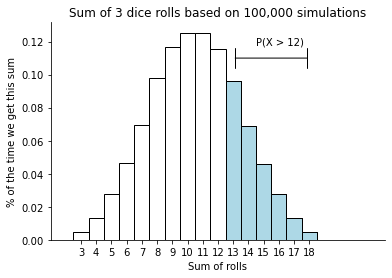

In [131]:
viz.simulation_example1(sum_of_sim)

#### Find which simulations "won"

In [133]:
sum_of_sim > 12

array([False, False, False, ...,  True,  True, False])

### 4. aggregate the resulting data to get our experimental probability

In [135]:
win_rate = (sum_of_sim > 12).mean()
win_rate

0.25706

### To complete this problem, we can calculate the expected profit from our win rate:

In [137]:
#calcaulate expected winnings from win rate and prize money
expected_winnings = win_rate * 15
expected_winnings

3.8559

In [138]:
#calculate expected profit by subtracting game cost from expected winnings
expected_winnings - 5

-1.1441

So we would expect, based on our simulations, on average, to lose a little over a dollar everytime we play this game.

### We can recalculate our win rate based on the sums being greater than or equal to 12:

In [139]:
win_rate = (sum_of_sim >= 12).mean()
win_rate

0.37267

In [140]:
#calcaulate expected winnings from win rate and prize money
expected_winnings = win_rate * 15
expected_winnings

5.59005

In [141]:
#calculate expected profit by subtracting game cost from expected winnings
expected_winnings - 5

0.5900499999999997

If our win condition changes to the sum being greater than or equal to 12, then, based on our simulations, on average, we expect to win about 60 cents

## No Rest or Relaxation

> There's a 30% chance my son takes a nap on any given weekend day. What is the chance that he takes a nap at least one day this weekend? What is the probability that he doesn't nap at all?

### 1. represent our data

In [203]:
p_nap = 0.3

n_days = 2
n_simulations = 100_000

### 2. set up matrix of random numbers

To determine whether or not a nap is taken on a given day, we'll generate a random number between 0 and 1, and say that it is a nap if it is less than our probability of taking a nap.

In [204]:
data = np.random.random((n_simulations,n_days))
data

array([[0.55758705, 0.69317389],
       [0.86092374, 0.41122823],
       [0.03247655, 0.07776878],
       ...,
       [0.00586052, 0.51972525],
       [0.53864334, 0.03197704],
       [0.77672868, 0.44968309]])

### 3. apply an aggregate row-wise to produce the results of each simulation

In [205]:
data < p_nap


array([[False, False],
       [False, False],
       [ True,  True],
       ...,
       [ True, False],
       [False,  True],
       [False, False]])

Now that we have each day as either true or false, we can take the sum of each row to find the total number of naps for the weekend. When we sum an array of boolean values, numpy will treat `True` as 1 and `False` as 0.

In [206]:
naps = (data < p_nap)
naps

array([[False, False],
       [False, False],
       [ True,  True],
       ...,
       [ True, False],
       [False,  True],
       [False, False]])

Now we have the results of our simulation, an array where each number in the array represents how many naps were taken in a two day weekend.

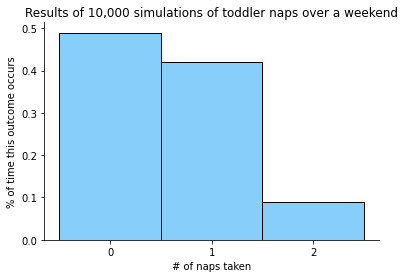

In [208]:
viz.simulation_example2(naps)

In [211]:
pd.Series(naps.sum(axis=1)).value_counts()

0    48953
1    42076
2     8971
dtype: int64

### 4. aggregate the resulting data to get our experimental probability

We can use this to answer our original questions, what is the probability that at least one nap is taken?

In [182]:
(naps >= 1).mean()

0.51133

What is the probability no naps are taken?

In [184]:
(naps == 0).mean()

0.48867

## One With Dataframes

Let's take a look at one more problem:

> What is the probability of getting at least one 3 in 3 dice rolls?

To simulate this, we'll use a similar strategy to how we modeled the dice rolls in the previous example, but this time, we'll store the results in a pandas dataframe so that we can apply a lambda function that will check to see if one of the rolls was a 3.

### 1. represent our data

In [185]:
outcome = [1,2,3,4,5,6]

n_simulations = 100_000
n_dice_rolled = 3

### 2. set up matrix of random numbers

In [191]:
rolls = np.random.choice(outcome, (n_simulations, n_dice_rolled))
rolls

array([[3, 6, 4],
       [2, 5, 2],
       [1, 6, 4],
       ...,
       [2, 6, 6],
       [5, 2, 4],
       [6, 4, 2]])

### store results in dataframe!

In [193]:
df = pd.DataFrame(rolls)
df

,0,1,2
0,3,6,4
1,2,5,2
2,1,6,4
3,5,1,1
4,6,4,1
...,...,...,...
99995,3,1,1
99996,1,4,2
99997,2,6,6
99998,5,2,4


### 3. apply an aggregate row-wise to produce the results of each simulation

In [200]:
(df == 3).sum(axis=1) >= 1 

0         True
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

### 4. aggregate the resulting data to get our experimental probability

In [202]:
((df == 3).sum(axis=1) >= 1).mean()

0.42083